logistic回归

## 导入包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import theano.tensor as tt

## 绘制sigmoid图像

Text(0,0.5,'$logistic(z)$')

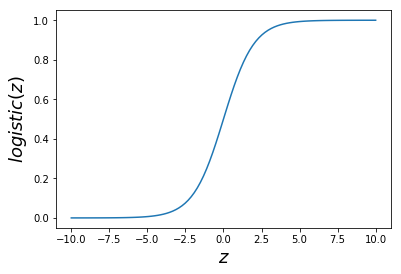

In [1]:
z = np.linspace(-10,10,100)
logistic = 1/(1+np.exp(-z))
plt.plot(z,logistic)
plt.xlabel('$z$',fontsize=18)
plt.ylabel('$logistic(z)$',fontsize=18)

## 导入数据集

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


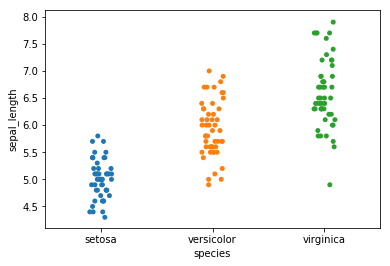

In [3]:
sns.stripplot(x="species",y="sepal_length",data=iris,jitter=True)

In [10]:
df = iris.query("species==('setosa','versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values

logp = -41.726, ||grad|| = 3.5299e-05: 100%|██████████| 23/23 [00:01<00:00, 21.53it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [16:18<00:00,  1.70draws/s]
C:\Users\kzq40\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The acceptance probability does not match the target. It is 0.886946962168492, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A053960B8>,
      dtype=object)

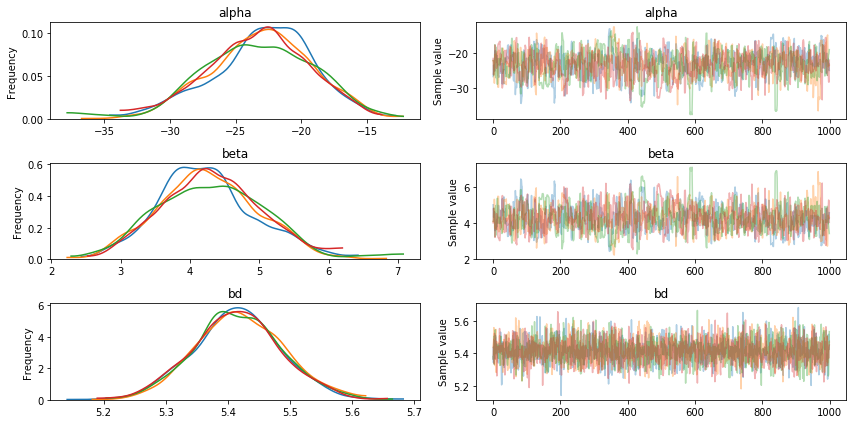

In [13]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha',mu=0,sd=10)
    beta = pm.Normal('beta',mu=0,sd=10)
    
    
    mu = alpha +pm.math.dot(x_0,beta)
    theta =pm.Deterministic('theta',1/(1+pm.math.exp(-mu)))
    bd = pm.Deterministic('bd',-alpha/beta)
    
    y1 = pm.Bernoulli('y1',theta,observed=y_0)
    start =pm.find_MAP()
    step = pm.NUTS()
    trace_0 = pm.sampling.sample(1000,step,start)
varnames = ['alpha','beta','bd']
pm.traceplot(trace_0,varnames)

In [14]:
pm.summary(trace_0,varnames)

C:\Users\kzq40\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,-23.221057,3.968731,0.147243,-30.397445,-15.304603,678.681747,1.001376
beta,4.288976,0.735819,0.027302,2.888909,5.672422,672.152260,1.001432
bd,5.415193,0.070081,0.001300,5.279408,5.555198,3155.537153,1.000381


Text(0,0.5,'$\\theta$')

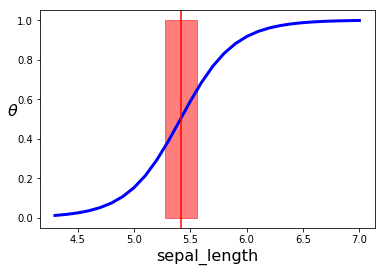

In [15]:
theta = trace_0['theta'].mean(axis=0)
idx = np.argsort(x_0)
plt.plot(x_0[idx],theta[idx],color='b',lw=3);
plt.axvline(trace_0['bd'].mean(),ymax=1,color='r')
bd_hpd = pm.hpd(trace_0['bd'])
plt.fill_betweenx([0,1],bd_hpd[0],bd_hpd[1],color='r',alpha=0.5)
plt.xlabel(x_n,fontsize=16)
plt.ylabel(r'$\theta$',rotation=0,fontsize=16)

In [16]:
def classify(n,threshold):
    n=np.array(n)
    mu = trace_0['alpha'].mean()+trace_0['beta'].mean()*n
    prob = 1/(1+np.exp(-mu))
    return prob,prob>=threshold
classify([5,5.5,6],0.5)

(array([0.14477611, 0.59105138, 0.9250344 ]), array([False,  True,  True]))